In [4]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [5]:
#hide
from fastbook import *

# Your Deep Learning Journey

## Deep Learning Is for Everyone

## Neural Networks: A Brief History

## Who We Are

## How to Learn Deep Learning

### Your Projects and Your Mindset

## The Software: PyTorch, fastai, and Jupyter

## Your First Model

### Getting a GPU Deep Learning Server

### Running Your First Notebook

In [6]:
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.193615,0.019564,0.007442,00:36


epoch,train_loss,valid_loss,error_rate,time
0,0.062780,0.021627,0.006766,00:45


In [7]:
learn_flesh = cnn_learner(dls, resnet34, metrics=error_rate, pretrained=False)

In [8]:
learn_flesh.fit(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.872227,0.721944,0.332882,00:46
1,0.746740,1.153464,0.361976,00:46
2,0.713352,0.740754,0.393099,00:46
3,0.659826,0.630795,0.308525,00:46
4,0.621684,0.626301,0.307172,00:46
5,0.639883,0.810540,0.300406,00:46
6,0.633426,1.306183,0.334912,00:46
7,0.631406,0.575155,0.294993,00:46
8,0.587421,0.524001,0.246955,00:46
9,0.542967,0.717281,0.429635,00:46


In [9]:
doc(learn.fit)

In [10]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

In [11]:
doc(untar_data)
path

Path('/storage/data/oxford-iiit-pet/images')

In [12]:
doc(ImageDataLoaders.from_name_func)

### Sidebar: This Book Was Written in Jupyter Notebooks

In [13]:
1+1

2

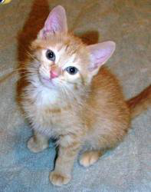

In [14]:
img = PILImage.create(image_cat())
img.to_thumb(192)

### End sidebar

In [15]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [16]:
#hide
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [17]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [18]:
is_cat,_,probs = learn_flesh.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.833392


### What Is Machine Learning?

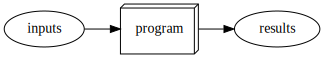

In [19]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

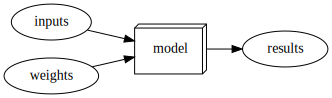

In [20]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

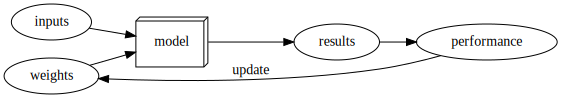

In [21]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

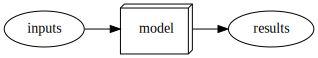

In [22]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

### What Is a Neural Network?

### A Bit of Deep Learning Jargon

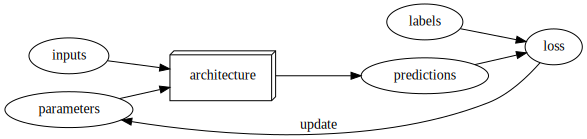

In [23]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

### Limitations Inherent To Machine Learning

From this picture we can now see some fundamental things about training a deep learning model:

- A model cannot be created without data.
- A model can only learn to operate on the patterns seen in the input data used to train it.
- This learning approach only creates *predictions*, not recommended *actions*.
- It's not enough to just have examples of input data; we need *labels* for that data too (e.g., pictures of dogs and cats aren't enough to train a model; we need a label for each one, saying which ones are dogs, and which are cats).

Generally speaking, we've seen that most organizations that say they don't have enough data, actually mean they don't have enough *labeled* data. If any organization is interested in doing something in practice with a model, then presumably they have some inputs they plan to run their model against. And presumably they've been doing that some other way for a while (e.g., manually, or with some heuristic program), so they have data from those processes! For instance, a radiology practice will almost certainly have an archive of medical scans (since they need to be able to check how their patients are progressing over time), but those scans may not have structured labels containing a list of diagnoses or interventions (since radiologists generally create free-text natural language reports, not structured data). We'll be discussing labeling approaches a lot in this book, because it's such an important issue in practice.

Since these kinds of machine learning models can only make *predictions* (i.e., attempt to replicate labels), this can result in a significant gap between organizational goals and model capabilities. For instance, in this book you'll learn how to create a *recommendation system* that can predict what products a user might purchase. This is often used in e-commerce, such as to customize products shown on a home page by showing the highest-ranked items. But such a model is generally created by looking at a user and their buying history (*inputs*) and what they went on to buy or look at (*labels*), which means that the model is likely to tell you about products the user already has or already knows about, rather than new products that they are most likely to be interested in hearing about. That's very different to what, say, an expert at your local bookseller might do, where they ask questions to figure out your taste, and then tell you about authors or series that you've never heard of before.

### How Our Image Recognizer Works

### What Our Image Recognizer Learned

### Image Recognizers Can Tackle Non-Image Tasks

### Jargon Recap

## Deep Learning Is Not Just for Image Classification

In [24]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.375451,2.529264,00:03


epoch,train_loss,valid_loss,time
0,2.042320,1.784876,00:03
1,1.732105,1.820879,00:03
2,1.550703,1.228155,00:03
3,1.383304,1.004273,00:03
4,1.232297,0.939276,00:03
5,1.106247,0.884563,00:03
6,1.005046,0.858174,00:03
7,0.925025,0.849855,00:03


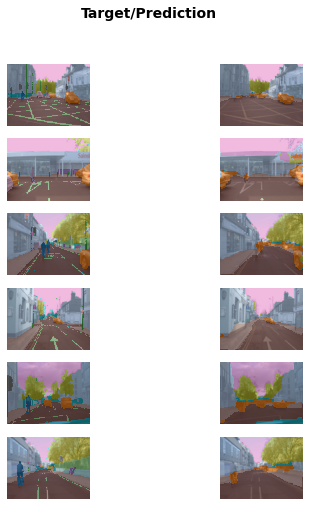

In [25]:
learn.show_results(max_n=6, figsize=(7,8))

In [33]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.454884,0.394592,0.819840,02:29


epoch,train_loss,valid_loss,accuracy,time
0,0.308827,0.253177,0.894960,04:55
1,0.230346,0.207973,0.918520,04:55
2,0.190868,0.182656,0.930080,04:55
3,0.140034,0.190199,0.929800,04:56


If you hit a "CUDA out of memory error" after running this cell, click on the menu Kernel, then restart. Instead of executing the cell above, copy and paste the following code in it:

```
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)
```

This reduces the batch size to 32 (we will explain this later). If you keep hitting the same error, change 32 to 16.

In [34]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([1.1473e-05, 9.9999e-01]))

In [35]:
learn.predict("What a waste of time!")

('neg', tensor(0), tensor([9.9998e-01, 1.5376e-05]))

### Sidebar: The Order Matters

### End sidebar

In [28]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [29]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.349115,0.366006,0.827856,00:09
1,0.357494,0.353373,0.832310,00:09
2,0.338936,0.351758,0.836456,00:09


In [30]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.505917,1.438087,00:00


epoch,train_loss,valid_loss,time
0,1.357988,1.372613,00:00
1,1.255674,1.177964,00:00
2,1.001434,0.867845,00:01
3,0.795944,0.731662,00:00
4,0.688393,0.701656,00:00
5,0.640529,0.693539,00:01
6,0.638961,0.690393,00:00
7,0.618351,0.688535,00:00
8,0.611381,0.688205,00:01
9,0.599380,0.688165,00:00


In [31]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,47.0,94.0,3.5,3.769058
1,20.0,46.0,4.0,3.257729
2,73.0,93.0,4.5,3.948596
3,11.0,97.0,4.0,3.545571
4,11.0,6.0,4.0,3.686128
5,41.0,72.0,5.0,3.411644
6,37.0,77.0,5.0,4.147070
7,98.0,71.0,4.0,4.633985
8,28.0,27.0,5.0,2.912866


### Sidebar: Datasets: Food for Models

### End sidebar

## Validation Sets and Test Sets

### Use Judgment in Defining Test Sets

## A _Choose Your Own Adventure_ moment

## Questionnaire

It can be hard to know in pages and pages of prose what the key things are that you really need to focus on and remember. So, we've prepared a list of questions and suggested steps to complete at the end of each chapter. All the answers are in the text of the chapter, so if you're not sure about anything here, reread that part of the text and make sure you understand it. Answers to all these questions are also available on the [book's website](https://book.fast.ai). You can also visit [the forums](https://forums.fast.ai) if you get stuck to get help from other folks studying this material.

For more questions, including detailed answers and links to the video timeline, have a look at Radek Osmulski's [aiquizzes](http://aiquizzes.com/howto).

##### Do you need these for deep learning?

   - Lots of math _F_
   - Lots of data _F_
   - Lots of expensive computers _F_
   - A PhD _F_
   
##### Name five areas where deep learning is now the best in the world. _Computer vision, speech recognition, medicine, recommendation systems, games (such as Go)._

##### What was the name of the first device that was based on the principle of the artificial neuron? 
_Perceptron._

##### Based on the book of the same name, what are the requirements for parallel distributed processing (PDP)? 
_A set of processing units, a state of activation, an output function for each unit, a pattern of connectivity, a propagation rule, an activation rule, a learning rule, an environment within which the system must operate._

##### What were the two theoretical misunderstandings that held back the field of neural networks? 
_First, Marvin Minksky wrote that only one layer of neurons wasn't going to be able to learn simple functions, a minimun of two layers were needed. The first part of the previous sencence was more recognized and this caused an AI winter. Second, even when the two layer neural network architecture began to get stablized, it was taken too literaly. In practice, two layer is not enough to get an efficient model and deeper architectures should be used._

##### What is a GPU? 
_A Graphics Processing Unit: a parallel computing system, initially created to speed up graphics calculations._

##### Open a notebook and execute a cell containing: `1+1`. What happens?

##### Follow through each cell of the stripped version of the notebook for this chapter. Before executing each cell, guess what will happen.

##### Complete the Jupyter Notebook online appendix.

##### Why is it hard to use a traditional computer program to recognize images in a photo? 
_It is practically impossible code manually all the steps and instructions necessary to do pattern recognition. For example, to identify a cat in its infinite possible possitions, first a micro pattern must be detected (a whisker) and this task alone is a rather difficult one, then heuristis about the possition of that single whisker in relation to other characteristics must be found... A traditional programming approach is not able to efficiently generate an algorithm that handles all the possibilities._

##### What did Samuel mean by "weight assignment"? 
_He meant setting the model variables to a specific value._

##### What term do we normally use in deep learning for what Samuel called "weights"? 
_Parameters._

##### Draw a picture that summarizes Samuel's view of a machine learning model.

##### Why is it hard to understand why a deep learning model makes a particular prediction? 
_Since we train the model as a hole blindly, it is unintuitive at the perceptron level. It takes a lot of work to decipher what each layer is doing precisely._

##### What is the name of the theorem that shows that a neural network can solve any mathematical problem to any level of accuracy?
_The universal approximation theorem._

##### What do you need in order to train a model?
    - Labeled data properly splitted into train, validation and test.
    - A loss function to evaluate the model fitness
    - A learning rule than modifies the model parameters based on its fitness

##### How could a feedback loop impact the rollout of a predictive policing model?
_When a model results are used to perform actions in the environment that affect the data collected in the future, a unwanted bias appears that perverses the model._

##### Do we always have to use 224×224-pixel images with the cat recognition model?
_No. Different network architectures are designed for different input sizes. Using bigger images could result in better accuracy, but it would take longer to train._

##### What is the difference between classification and regression?
_Classification tries to predict discretized outputs (classes). Regression deals with continuous values, such as temperature or income._

##### What is a validation set? What is a test set? Why do we need them?
_A validation set is a subset of the input data that is hidden from the learning algorithm, in order to avoid overfitting.
A test set is also hidden from us, because even our own iterations searching for the best model (adjusting hyperparametrs) could result in a loss of generalization._

##### What will fastai do if you don't provide a validation set?
_It will always held out 20% of the data to use it as validation set._

##### Can we always use a random sample for a validation set? Why or why not?
_No. The validation set must be representative of the full dataset. For example, when dealing with timeseries it is encouraged to select the most recent interval as validation, and let the model predict its future datapoints. If we were to select random points as validation, the middle random points would be too easy to predict. Thus, a continuous subset must be held out._

##### What is overfitting? Provide an example.
_Overfitting is failing to generalize, being unable to properly predict unseen datapoints. For example, if a model that tries to predict whether a person is wearing a face mask or no, if given enought degrees of freedom could overfit and just learn one by one which images in the dataset correspond to which label (in this case, face mask or no) and when pressented with a new image throw a random prediction._

##### What is a metric? How does it differ from "loss"?
_A metric is a function that measures the fitness of a model. It is intended to be read by humans. Loss also measures how good or bad a prediction is, but it is designed for fast backpropagation._

##### How can pretrained models help?
_In computer vision, the rought patterns detected in the early layers are common to most application. Lines, circles, diagonals, edges... It would be a waste of time and resources to train them for every dataset, and it could result in overfitting._

##### What is the "head" of a model?
_The head of a model is the later layers that are trained specifically for each dataset. It is the part that is discarted in pretained models._

##### What kinds of features do the early layers of a CNN find? How about the later layers?
_Early layers find easy patterns: straight lines, curves, circles...
Later layers are for detecting higher order patterns. In an image classification model, that could be eyes, ears, cars, doors..._

##### Are image models only useful for photos?
_Absolutely not. Convolutional neural networks are used in any problem that could be translated into an image like representation and shows some patters in that representation. The best example is audio, the fourier transform of an audio track shows its temporal characteristics in a very usefull static image._

##### What is an "architecture"?
_An architecture is the inner workings of a neural network. It is the way all the layers are connected between them._

##### What is segmentation?
_Segmentation is recognizing the content of every individual pixel in an image. It is very used in autonomous vehicles._

##### What is `y_range` used for? When do we need it?
_When doing regression, that is, predicting continuous values, we must specify the range of our target._

##### What are "hyperparameters"?
_Hyperparameters are the variables that are not trained in the feedback loop training. We must choose them ourselves, a priori. There are ways to optimize for these hyperparameters, but they are in an outter feedback loop._

##### What's the best way to avoid failures when using AI in an organization?
_The most crucial issue here is choosing a good test set and not using it in the development process._

### Further Research

Each chapter also has a "Further Research" section that poses questions that aren't fully answered in the text, or gives more advanced assignments. Answers to these questions aren't on the book's website; you'll need to do your own research!

##### Why is a GPU useful for deep learning? How is a CPU different, and why is it less effective for deep learning?
_Deep learning models consist of layers upon layers of perceptrons. The most effective way to represent mathematically this models is in matrix form. Operations between matrices are by definition very paralelizable (in matrix multiplication, each resulting number does **not** depend on each other).

GPUs are processors designed and optimized to parallel computing. They are not fast when comparing the speed of a single operation to that of CPUs, but GPUs are extremely efficient performing millions of operations in simultaneously._

##### Try to think of three areas where feedback loops might impact the use of machine learning. See if you can find documented examples of that happening in practice.
_Every area that uses machine learning could be prone to feedback loops. Some months ago, a chatbot released in Twitter adquired some rather polarized traits: it was racist, sexist and disrespectful. This aggressive behaviour, if not shut down, could result in more overall aggressiveness in the social network. If this more aggressive social behaviour were to be feedback to the model, it would become even more disrespectful._